In [92]:
import pandas as pd
import numpy as np
import math
import time
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

In [93]:
dfx = pd.read_csv('linearX.csv')
dfy = pd.read_csv('linearY.csv')
x1 = dfx.to_numpy()
y = dfy.to_numpy()

x_normed = (x1 - x1.mean(axis=0)) / x1.std(axis=0)
x = np.ones((dfx.shape[0], 1))
x = np.append(x, x_normed, axis=1)

theta0 = []
theta1 = []
j_theta = []

In [109]:
def converged(delta_theta_j_theta, conv):
    s = abs(delta_theta_j_theta[0]) + abs(delta_theta_j_theta[1])
    if(s<conv):
        return True
    return False

def loss(theta, m):
    res = 0.0
    h_theta_x = np.zeros((m, 1))
    diff = np.zeros((m, 1), dtype='float64')
    for i in range(0, m):
        h_theta_x[i][0] = theta[0]*x[i][0] + theta[1]*x[i][1]
        diff[i][0] = math.pow((h_theta_x[i][0] - y[i][0]), 2)/2
        res += diff[i][0]
    
    return res/m
    
    
def deltaj(theta, m):
    h_theta_x = np.zeros((m, 1))
    for i in range(0, m):
        h_theta_x[i][0] = theta[0]*x[i][0] + theta[1]*x[i][1]
    diff = h_theta_x - y
    final = np.zeros((m, 2))
    for i in range(0, m):
        final[i, :] = diff[i][0]*x[i,:]
    return np.mean(final, axis=0)

def gradientdescent(eta, conv, m):
    theta = np.array([0.0, 0.0])
    theta0.clear()
    theta1.clear()
    j_theta.clear()
    theta0.append(0.0)
    theta1.append(0.0)
    delta_theta_j_theta = np.ones(2, dtype='float64')
    t = 0
    
    while(converged(delta_theta_j_theta, conv) == False):
        delta_theta_j_theta = deltaj(theta, m)
        j_theta.append(loss(theta, m))
        for i in range(0, 2):
            theta[i] = theta[i] - eta*delta_theta_j_theta[i]
        theta0.append(theta[0])
        theta1.append(theta[1])
        t += 1
    j_theta.append(loss(theta, m))
    print(t)    
    return t, theta

t, theta = gradientdescent(0.001, 0.0001, dfx.shape[0])
print(theta)

9205
[0.9965344 0.0013578]


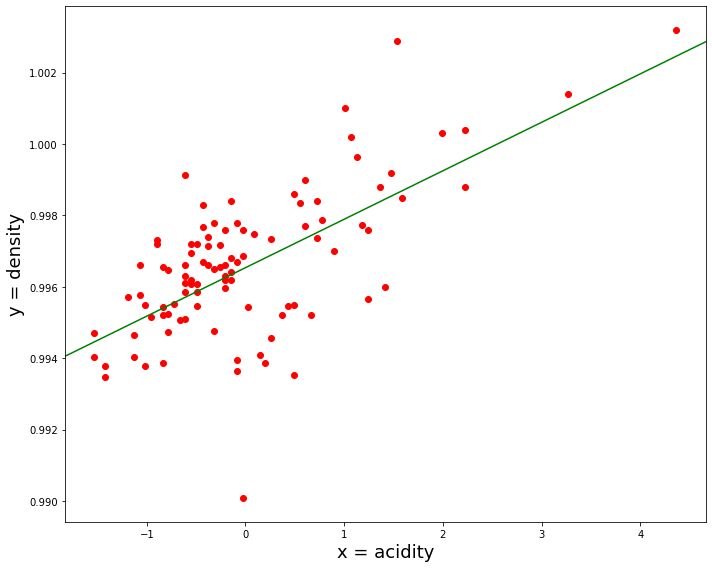

In [95]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
plt.scatter(x_normed[:, 0], y[:, 0], c='red')
plt.axline((0, theta[0]), slope=theta[1], c='green')
plt.xlabel('x = acidity', fontsize=18)
plt.ylabel('y = density', fontsize=18)
plt.show()

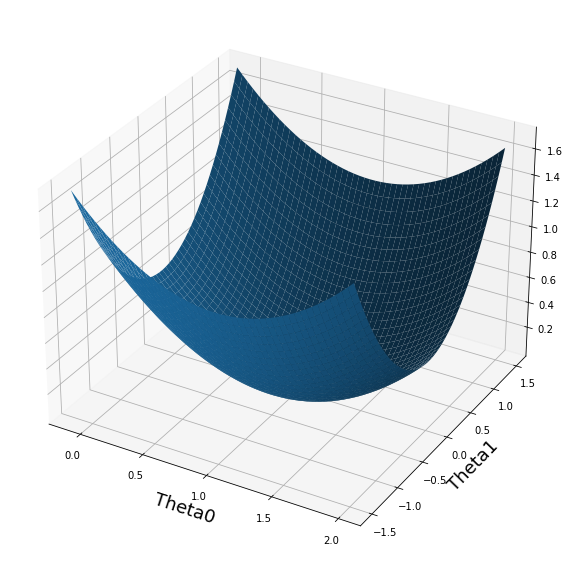

In [97]:
x1 = np.linspace(2.01, -0.1, 50)
y1 = np.linspace(-1.5, 1.5, 50)
t0, t1 = np.meshgrid(np.array(x1), np.array(y1))
cost_mesh = np.array([loss(np.array([T0,T1]), dfx.shape[0]) for T0, T1 in zip(np.ravel(t0), np.ravel(t1))  ])
z = cost_mesh.reshape(t0.shape)
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
ax = plt.axes(projection ='3d')
ax.plot_surface(t0, t1, z)
plt.xlabel('Theta0', fontsize=18)
plt.ylabel('Theta1', fontsize=18)
plt.show()

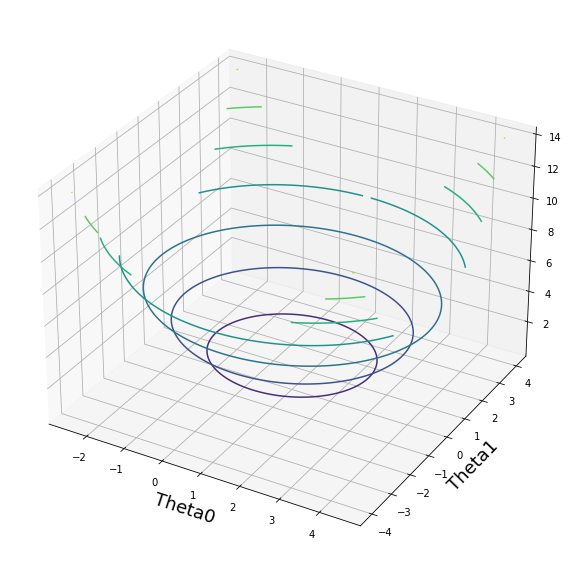

In [99]:
x2 = np.linspace(4.5, -2.5, 150)
y2 = np.linspace(-4, 4, 150)
t0dash, t1dash = np.meshgrid(x2, y2)
cost_mesh1 = np.array([loss(np.array([T0,T1]), dfx.shape[0]) for T0, T1 in zip(np.ravel(t0dash), np.ravel(t1dash))  ])
zdash = cost_mesh1.reshape(t0dash.shape)

plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
ax = plt.axes(projection ='3d')
ax.contour(t0dash, t1dash, zdash)
plt.xlabel('Theta0', fontsize=18)
plt.ylabel('Theta1', fontsize=18)
plt.show()

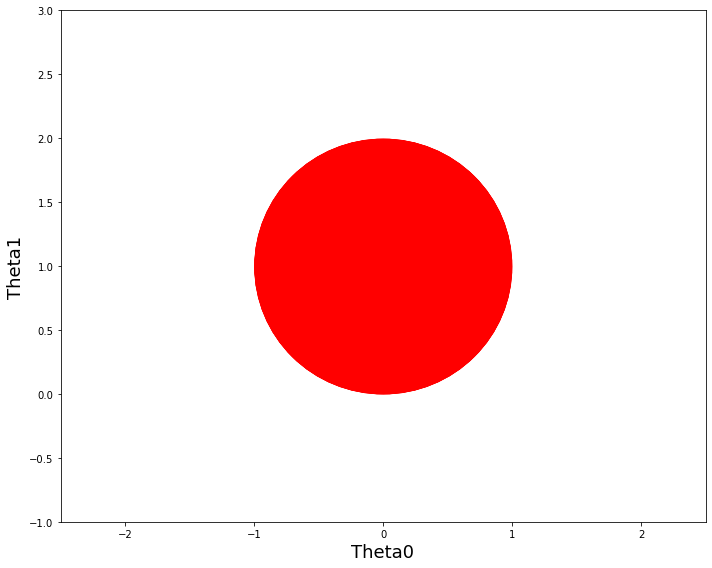

In [110]:
s = 0
for i in range(0, dfx.shape[0]):
    s += math.pow(x_normed[i][0], 2)
a = s/(2*dfx.shape[0])

s = 0
for i in range(0, dfx.shape[0]):
    s += math.pow(x[i][0], 2)
b = s/(2*dfx.shape[0])

s = 0
for i in range(0, dfx.shape[0]):
    s += x[i][1]*y[i][0]
c = -s/(dfx.shape[0])

s = 0
for i in range(0, dfx.shape[0]):
    s += x[i][0]*y[i][0]
d = -s/(dfx.shape[0])

s = 0
for i in range(0, dfx.shape[0]):
    s += math.pow(y[i][0], 2)
e = s/(2*dfx.shape[0])

centre0 = -c/(2*a)
centre1 = -d/(2*b)

radius = []
for i in range(0, t):
    radius.append(math.sqrt(j_theta[i]/a - e/a + (c*c)/(4*a*a) + (d*d)/(4*a*b)))
    
fig, ax = plt.subplots()
for i in range(len(radius)):
    circle1 = plt.Circle((centre0, centre1), radius[i], color = 'r', fill=False)
    ax.add_artist(circle1)

plt.rcParams["figure.figsize"] = [10, 8]    
plt.xlim(-2.5, 2.5)
plt.ylim(-1, 3)
plt.xlabel('Theta0', fontsize=18)
plt.ylabel('Theta1', fontsize=18)
plt.show()

365


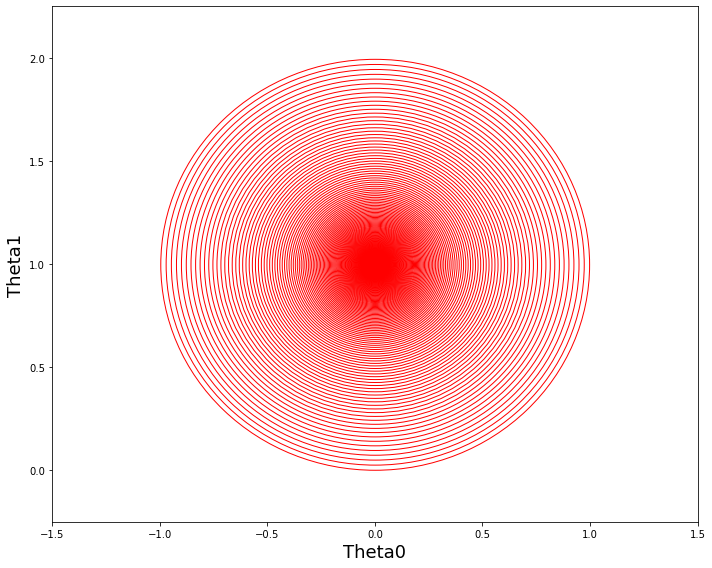

In [112]:
t, theta = gradientdescent(0.025, 0.0001, dfx.shape[0])
radius.clear()
for i in range(0, t):
    radius.append(math.sqrt(j_theta[i]/a - e/a + (c*c)/(4*a*a) + (d*d)/(4*a*b)))
    
fig, ax = plt.subplots()
for i in range(len(radius)):
    circle1 = plt.Circle((centre0, centre1), radius[i], color = 'r', fill=False)
    ax.add_artist(circle1)

plt.rcParams["figure.figsize"] = [10, 8]    
plt.xlim(-1.5, 1.5)
plt.ylim(-0.25, 2.25)
plt.xlabel('Theta0', fontsize=18)
plt.ylabel('Theta1', fontsize=18)
plt.show()

89


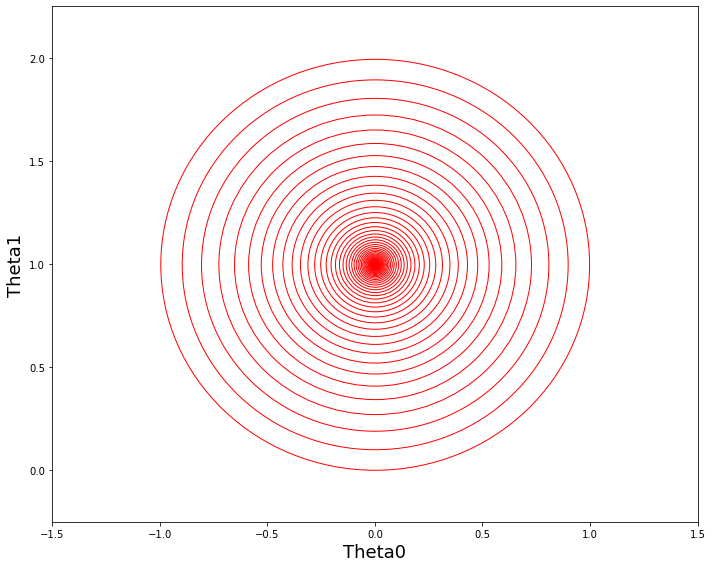

In [113]:
t, theta = gradientdescent(0.1, 0.0001, dfx.shape[0])
radius.clear()
for i in range(0, t):
    radius.append(math.sqrt(j_theta[i]/a - e/a + (c*c)/(4*a*a) + (d*d)/(4*a*b)))
    
fig, ax = plt.subplots()
for i in range(len(radius)):
    circle1 = plt.Circle((centre0, centre1), radius[i], color = 'r', fill=False)
    ax.add_artist(circle1)

plt.rcParams["figure.figsize"] = [10, 8]    
plt.xlim(-1.5, 1.5)
plt.ylim(-0.25, 2.25)
plt.xlabel('Theta0', fontsize=18)
plt.ylabel('Theta1', fontsize=18)
plt.show()